In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
customers = pd.read_csv('Customers.csv', parse_dates=['SignupDate'])
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv', parse_dates=['TransactionDate'])

In [3]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [4]:
print(merged_data.columns)

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')


In [5]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())
print(merged_data.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


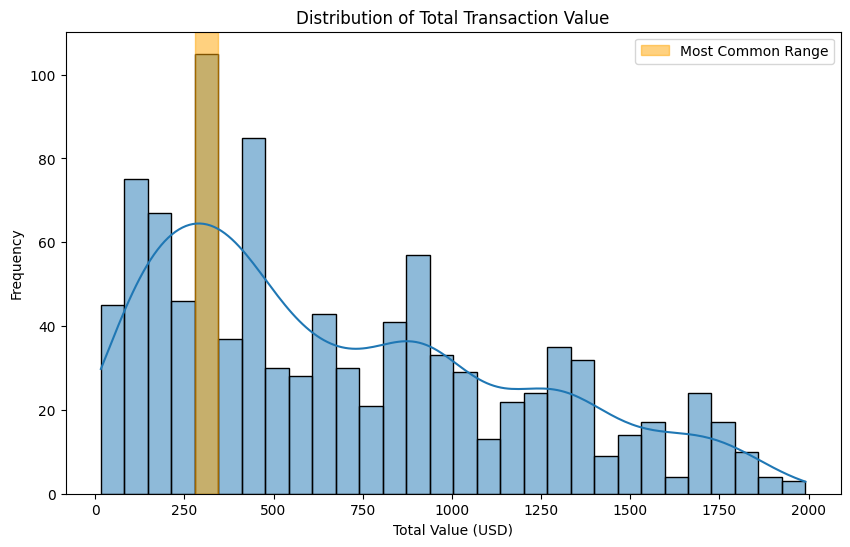

The majority of transactions fall within the range: $279.41 to $345.24


In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(transactions['TotalValue'], bins=30, kde=True)
plt.title('Distribution of Total Transaction Value')
plt.xlabel('Total Value (USD)')
plt.ylabel('Frequency')

counts, bin_edges = np.histogram(transactions['TotalValue'], bins=30)
max_count_index = np.argmax(counts)
max_count_value_range = (bin_edges[max_count_index], bin_edges[max_count_index + 1])
plt.axvspan(max_count_value_range[0], max_count_value_range[1], color='orange', alpha=0.5, label='Most Common Range')

plt.legend()
plt.show()

print(f"The majority of transactions fall within the range: ${max_count_value_range[0]:.2f} to ${max_count_value_range[1]:.2f}")

Count of each product name:
ProductName
ActiveWear Smartwatch          40
SoundWave Headphones           38
BookWorld Biography            30
ActiveWear Rug                 29
SoundWave Cookbook             29
                               ..
HomeSense Bluetooth Speaker     7
BookWorld Wall Art              7
SoundWave Laptop                7
SoundWave Bluetooth Speaker     7
SoundWave Jacket                5
Name: count, Length: 66, dtype: int64


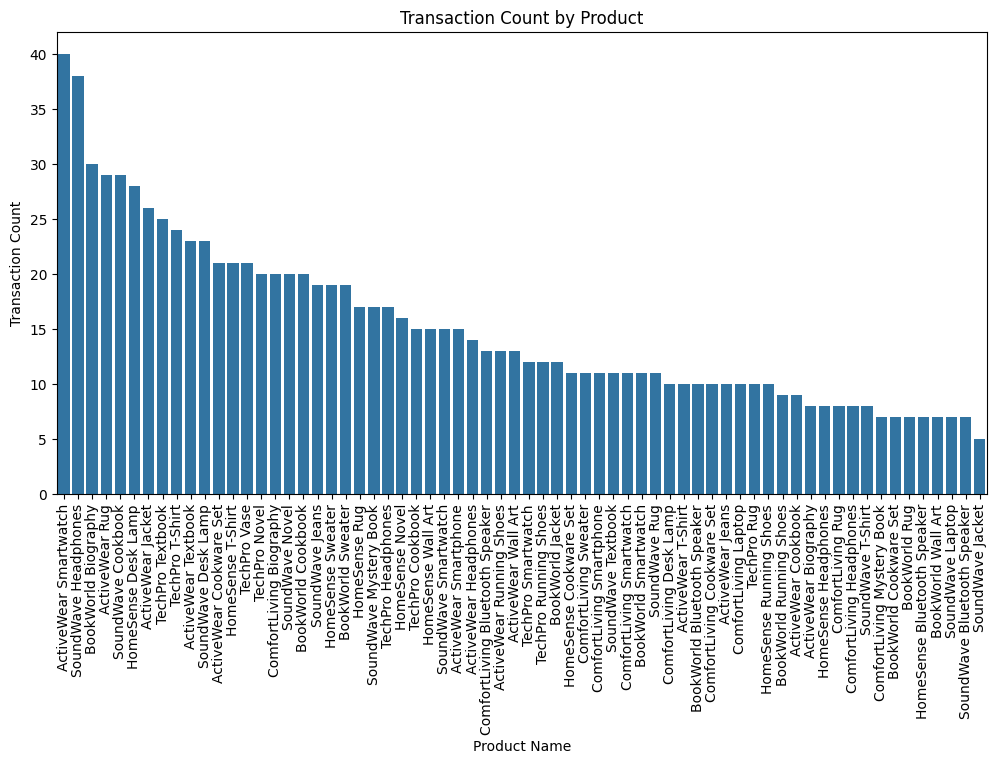

In [7]:
category_counts = merged_data['ProductName'].value_counts()
print("Count of each product name:")
print(category_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Transaction Count by Product')
plt.xlabel('Product Name')
plt.ylabel('Transaction Count')
plt.xticks(rotation=90)
plt.show()


Number of new signups per year:
Signup_Year
2022    64
2023    57
2024    79
Name: count, dtype: int64


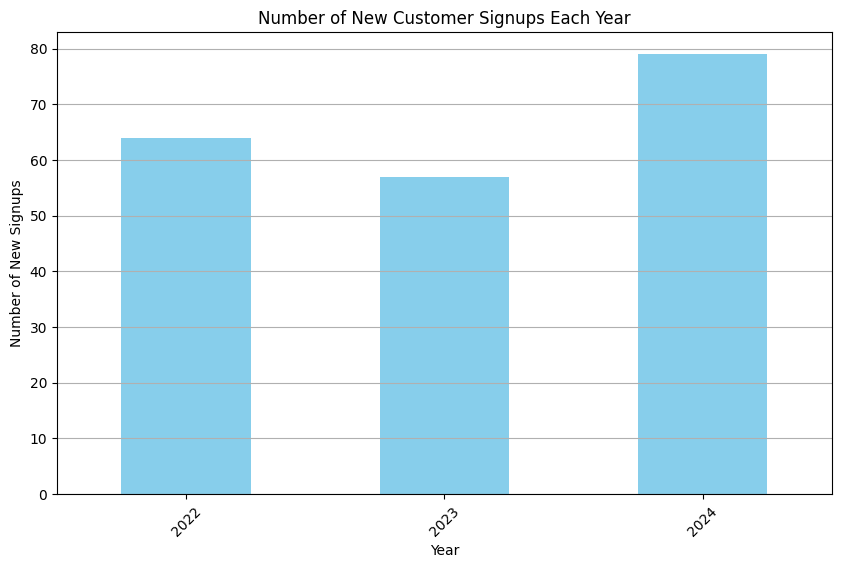

In [8]:
customers['Signup_Year'] = customers['SignupDate'].dt.year
new_signups_per_year = customers['Signup_Year'].value_counts().sort_index()
print("\nNumber of new signups per year:")
print(new_signups_per_year)

plt.figure(figsize=(10, 6))
new_signups_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of New Customer Signups Each Year')
plt.xlabel('Year')
plt.ylabel('Number of New Signups')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Average transaction value by category:
Category
Electronics    288.722008
Clothing       283.104254
Books          280.526222
Home Decor     237.616250
Name: Price_y, dtype: float64


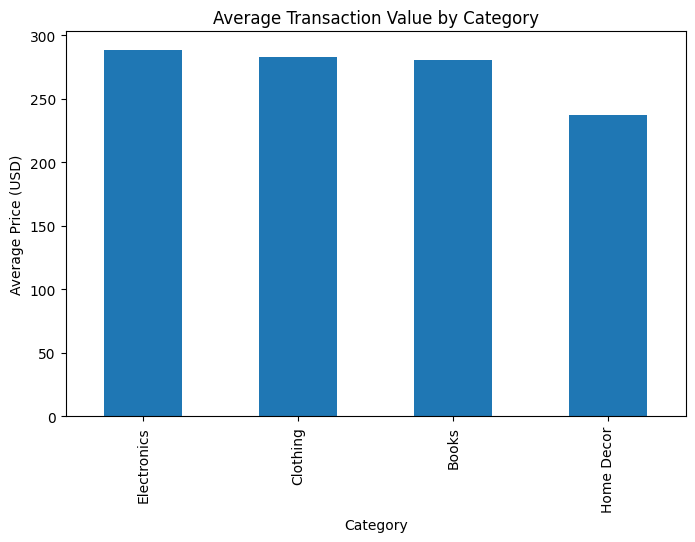

In [9]:
avg_transaction_value = merged_data.groupby('Category')['Price_y'].mean().sort_values(ascending=False)
print("Average transaction value by category:")
print(avg_transaction_value)
avg_transaction_value.plot(kind='bar', title='Average Transaction Value by Category', figsize=(8, 5))
plt.ylabel('Average Price (USD)')
plt.show()


Transaction frequency by region:
Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64


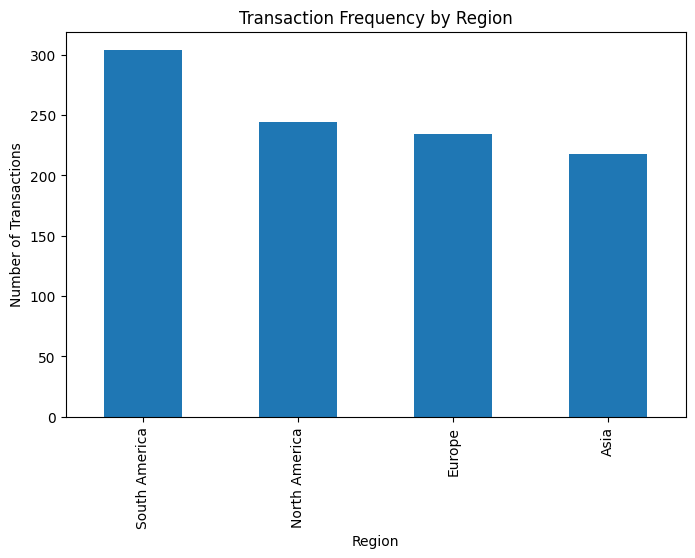

In [10]:
region_transaction_frequency = merged_data['Region'].value_counts()
print("\nTransaction frequency by region:")
print(region_transaction_frequency)
region_transaction_frequency.plot(kind='bar', title='Transaction Frequency by Region', figsize=(8, 5))
plt.ylabel('Number of Transactions')
plt.show()

Percentage of transactions by day:
Tuesday: 16.30%
Wednesday: 15.80%
Thursday: 15.00%
Sunday: 13.90%
Monday: 13.90%
Saturday: 12.60%
Friday: 12.50%


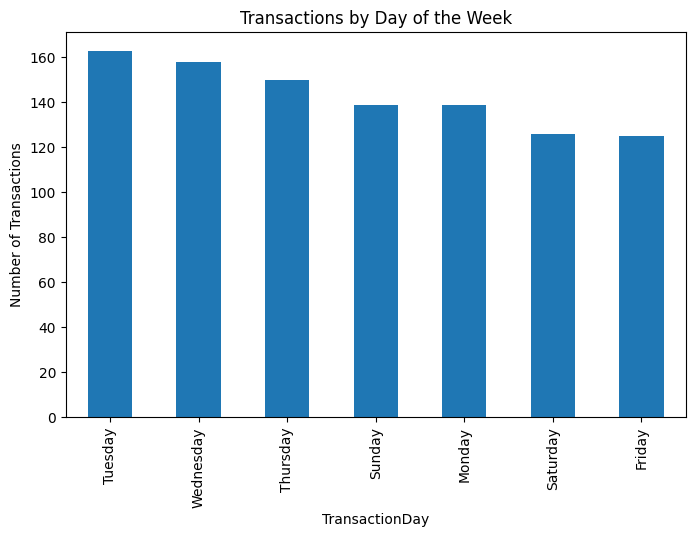

In [11]:
merged_data['TransactionDay'] = merged_data['TransactionDate'].dt.day_name()
daywise_transactions = merged_data['TransactionDay'].value_counts()
total_transactions = merged_data.shape[0]
daywise_percentage = (daywise_transactions / total_transactions) * 100

print("Percentage of transactions by day:")
for day, percentage in daywise_percentage.items():
    print(f"{day}: {percentage:.2f}%")

daywise_transactions.plot(kind='bar', title='Transactions by Day of the Week', figsize=(8, 5))
plt.ylabel('Number of Transactions')
plt.show()

***Bussiness Insights***

---
1. The majority of transactions fall within the range: \$279.41 to \$345.24
2. The popular item is an Active Wear Smartwatch.
3. The average transaction value is highest in the Electronics category, indicating a potential focus area for marketing efforts.
4. Customers from North America have the highest transaction frequency, suggesting targeted promotions could enhance sales in this region.
5. A Maximum number of new customers signed up in 2024, indicates a growing customer base that can be leveraged for future campaigns.
6. The majority of transactions occurred on weekdays, suggesting that promotional activities should be intensified during this period.
